#### DATA ANALYSIS TEXTBOOK
##### CH03
##### Home field advantage
##### football dataset
#
##### WHAT THIS CODES DOES:
##### creates desrciptive stats
#

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/football/clean/"
data_out = dirname + "da_case_studies/ch03-football-home-advantage/"
output = dirname + "da_case_studies/ch03-football-home-advantage/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
df = pd.read_csv(data_in + "epl_games.csv")

In [5]:
df = df.loc[df.season == 2016, :].reset_index(drop=True)

In [6]:
df.shape

(380, 9)

In [7]:
df.head().T

,0,1,2,3,4
div,E0,E0,E0,E0,E0
season,2016,2016,2016,2016,2016
date,13aug2016,13aug2016,13aug2016,13aug2016,13aug2016
team_home,Middlesbrough,Burnley,Everton,Crystal Palace,Man City
team_away,Stoke,Swansea,Tottenham,West Brom,Sunderland
points_home,1,0,1,0,3
points_away,1,3,1,3,0
goals_home,1,0,1,0,2
goals_away,1,1,1,1,1


In [8]:
df["home_goaladv"] = df["goals_home"] - df["goals_away"]

In [9]:
df.home_goaladv.describe()

count    380.000000
mean       0.394737
std        1.907346
min       -6.000000
25%       -1.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: home_goaladv, dtype: float64

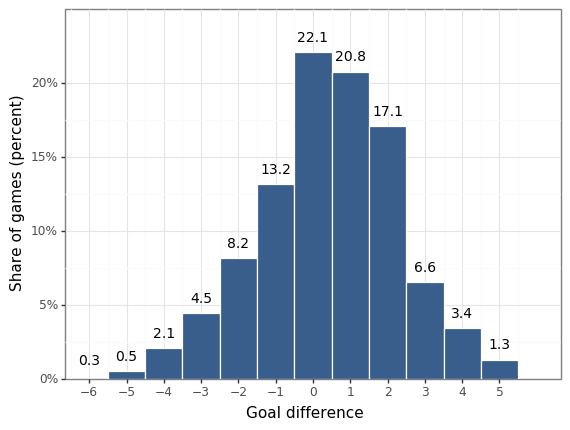

<ggplot: (8740409577668)>

In [10]:
ggplot(df, aes(x="home_goaladv", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=1
) + geom_text(
    aes(label="[round(x,1) for x in stat(count)/sum(stat(count))*100]"),
    stat="count",
    size=10,
    nudge_y=0.01,
) + labs(
    x="Goal difference", y="Share of games (percent)"
) + scale_x_continuous(
    expand=(0.05, 0.05), limits=(-6, 6), breaks=seq(-6, 6, by=1)
) + scale_y_continuous(
    expand=(0, 0),
    limits=(0, 0.25),
    breaks=seq(0, 0.25, by=0.05),
    labels=percent_format(),
) + theme_bw()

In [11]:
(
    df.query('team_home in ["Chelsea", "Arsenal", "Leicester", "Stoke", "West Ham"]')
    .groupby("team_home")
    .agg(
        Count=("home_goaladv", "size"),
        Mean=("home_goaladv", np.mean),
        Median=("home_goaladv", np.median),
        Std=("home_goaladv", np.std),
        Min=("home_goaladv", min),
    )
)

,Count,Mean,Median,Std,Min
team_home,,,,,
Arsenal,19,1.210526,1,1.182227,-1
Chelsea,19,2.000000,2,1.563472,-1
Leicester,19,0.315789,1,2.237375,-5
Stoke,19,0.000000,0,1.855921,-4
West Ham,19,-0.631579,0,2.033348,-4


In [12]:
(
    df.query(
        'team_home in ["Chelsea", "Arsenal", "Leicester", "Stoke", "West Ham"]'
    )['home_goaladv'].describe()
)

count    95.000000
mean      0.578947
std       2.003077
min      -5.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: home_goaladv, dtype: float64